# Aliasing demonstrated by under sampling cosine waves
A continuous function or signal can be converted into a discrete sequence of numbers by sampling the signal at a regular time interval.  The number sequences can be analyszed by computers.  In order to accurately process the signal the sample frequency must be at least twice the highest frequency in the signal.  This jupyter notebook demonstrates frequency aliasing caused when frequencies above half the sample frequency are in the signal.

The movie illusion that makes wheels appear to spin backwards is called the wagon wheel effect.   This artifact is a type of aliasing caused by course time sampling by the cameras.  https://jackschaedler.github.io/circles-sines-signals/sampling4.html introduces  one type of aliasing.  This notebook demonstrates aliasing caused by under sampling cosine waves.

In [1]:
# import some standard libraries
import sys

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

print ("sys.version=",sys.version)

sys.version= 3.7.5 (default, Oct 25 2019, 10:52:18) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


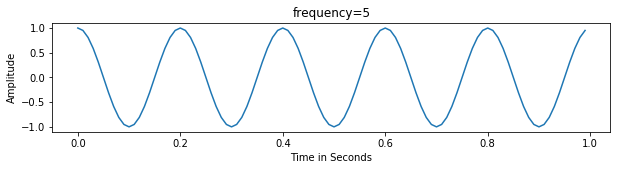

In [2]:
# sample and plot a 5 HZ cosine function
# the array cos_2_pi_f_t is one second of the function sampled at 100 samples per second
sps=100
deltat=1.0/sps
time=np.arange(0,1.0,deltat)
#print('time=',time)
frequency=5
cos_2_pi_f_t=np.cos(2*np.pi*frequency*time)
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('frequency=%d'%frequency)
plt.plot(time,cos_2_pi_f_t)
plt.show()

#You can count 5 cycles in 1 second

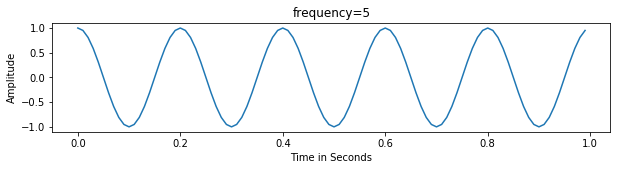

In [3]:
# create a function that can be used to sample and plot several frequencies
def plotcos_2_pi_f_t(frequency):
    time=np.arange(0,1.0,.01)
    cos_2_pi_f_t=np.cos(2*np.pi*frequency*time)
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.set_xlabel('Time in Seconds')
    ax.set_ylabel('Amplitude')
    plt.title('frequency=%d'%frequency)
    plt.plot(time,cos_2_pi_f_t)
    plt.show()
   
plotcos_2_pi_f_t(5)
# the 5 hz test looks good.

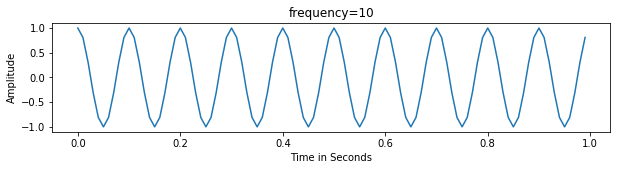

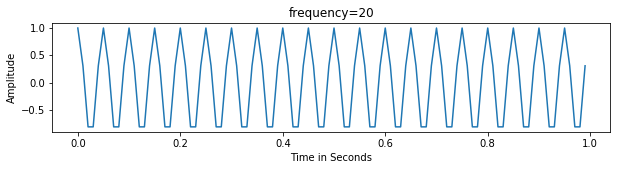

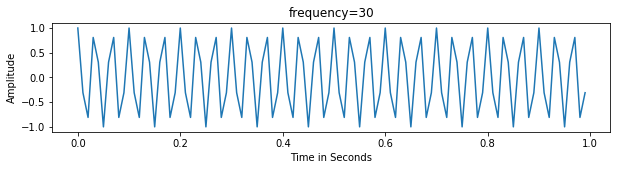

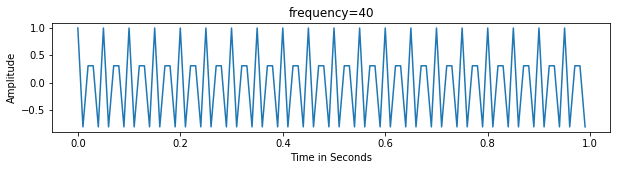

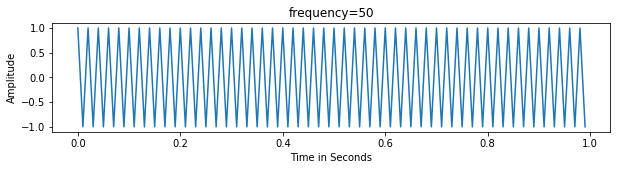

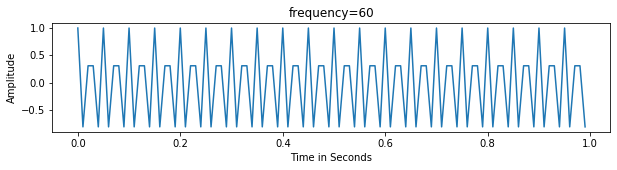

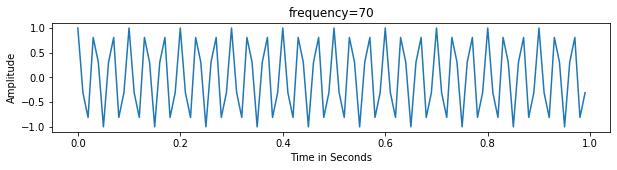

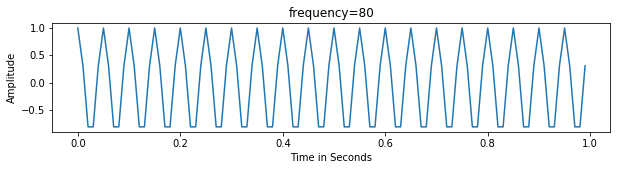

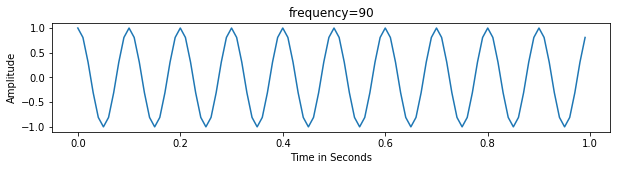

In [4]:
# make plots of 10, 20, 30, 40, 50, 60, 70, 80, and 90 hz
for frequency in range(10,100,10):
    plotcos_2_pi_f_t(frequency)

In [5]:
# Plots above look ok until after 50 hz.  The 90 Hz looks like 10 Hz 

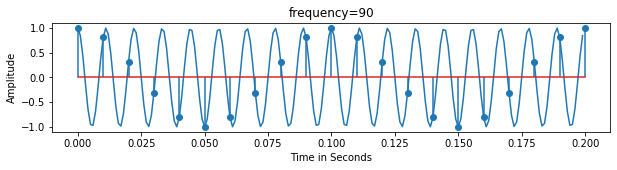

In [6]:
# make a plot showing where the samples are made on the 90 hz cosine function
sps_fine=1000
deltat_fine=1.0/sps_fine
time_fine=np.arange(0,.20,deltat_fine)
frequency=90
cos_2_pi_f_t_fine=np.cos(2*np.pi*frequency*time_fine)
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Time in Seconds')
ax.set_ylabel('Amplitude')
plt.title('frequency=%d'%frequency)
plt.plot(time_fine,cos_2_pi_f_t_fine)

cos_2_pi_f_t=np.cos(2*np.pi*frequency*time)
plt.stem(time[0:21],cos_2_pi_f_t[0:21],use_line_collection=True)


plt.show()

# The source of the problem is clearer.

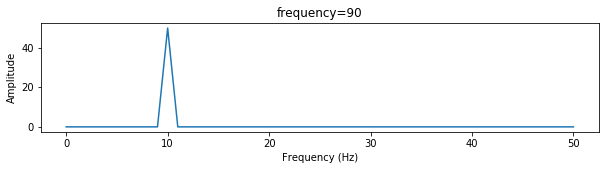

In [7]:
# What does it look like in frequency domain?  A Fourier transform
# will decompose a signal into cosine waves of various frequencies.
frequency=90
cos_2_pi_f_t=np.cos(2*np.pi*frequency*time)

frequencies=np.fft.rfftfreq(cos_2_pi_f_t.size,d=deltat)
deltaF=1.0/(cos_2_pi_f_t.size*deltat)
#print('deltaF=1.0/(cos_2_pi_f_t.size*deltat)=',deltaF)
#frequencies[:3]
SPECTRUM=np.fft.rfft(cos_2_pi_f_t)
#plt.plot(np.absolute(EVENT))
#plt.show()
fig, ax = plt.subplots(figsize=(10, 2))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude')
plt.title('frequency=%d'%frequency)
plt.plot(frequencies,np.absolute(SPECTRUM))
plt.show()

# The spectrum is the quantity of each cosine frequency.  
# The Fourier transform detected it as 10 Hz.   

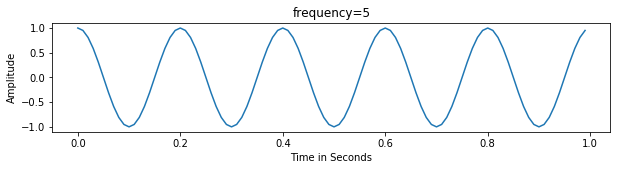

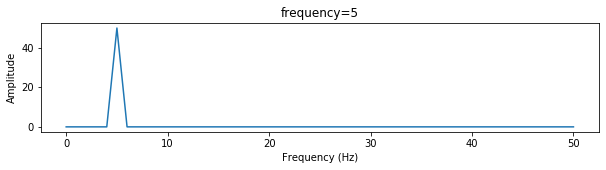

In [8]:
# define and test a function to use to plot several SPECTRUM's
def plotcos_2_pi_f_t_spectrum(frequency):
    time=np.arange(0,1.0,.01)
    cos_2_pi_f_t=np.cos(2*np.pi*frequency*time)
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.set_xlabel('Time in Seconds')
    ax.set_ylabel('Amplitude')
    plt.title('frequency=%d'%frequency)
    plt.plot(time,cos_2_pi_f_t)
    plt.show()
    frequencies=np.fft.rfftfreq(cos_2_pi_f_t.size,d=deltat)

    deltaF=1.0/(cos_2_pi_f_t.size*deltat)

    SPECTRUM=np.fft.rfft(cos_2_pi_f_t)
    #plt.plot(np.absolute(EVENT))
    #plt.show()
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    plt.title('frequency=%d'%frequency)
    plt.plot(frequencies,np.absolute(SPECTRUM))
    plt.show()



   
plotcos_2_pi_f_t_spectrum(5)

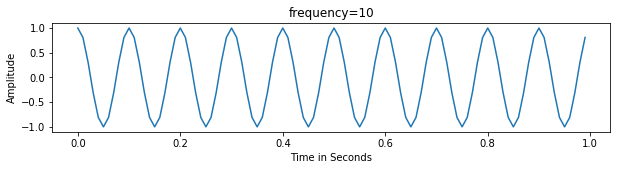

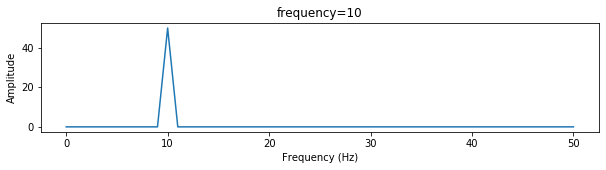

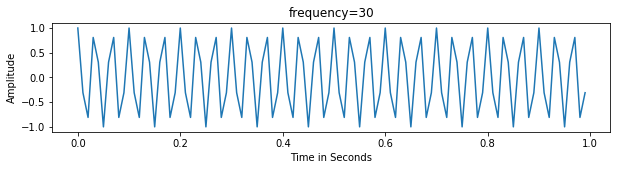

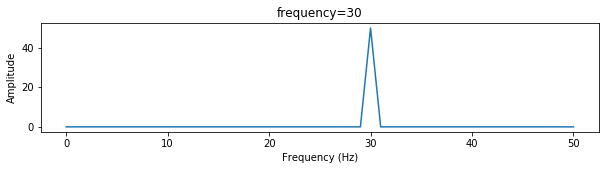

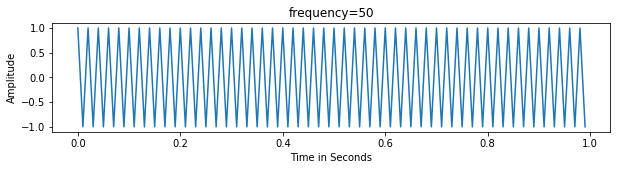

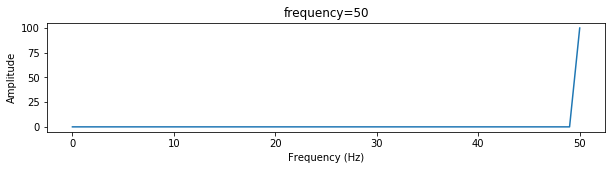

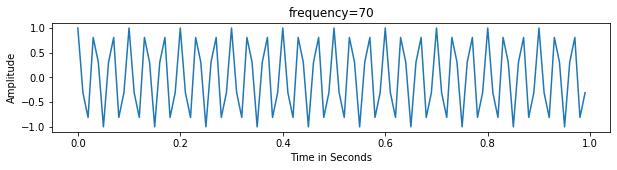

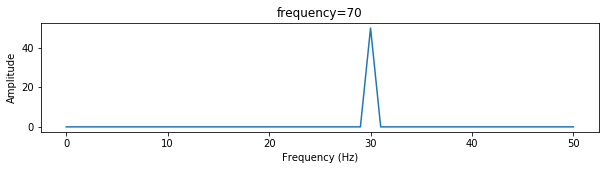

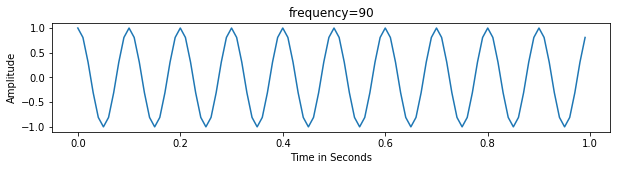

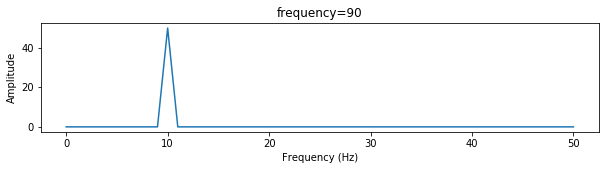

In [9]:
# PLot time series and SPECTRUM for 10, 30, 50, 70, and 90 H.
for frequency in range(10,100,20):
    plotcos_2_pi_f_t_spectrum(frequency)

1/2 the sample frequency is called the Nyquist frequency.  Frequencies above Nyquist are aliased to a frequency that is a mirror around Nyquist.

To ensure no frequencies above the Nyquist frequency a high cut or low pass filter is applied before sampling.  A high cut filter cuts out the high firequencies.  A low pass filter passes the low frequencies.  Two names for the same thing.  This can be can an RC (Resistor/Capacitor) or LC (Inductor/Capacitor) circuit.

Learn about low pass (high cut) filters at:
https://www.youtube.com/watch?v=OBM5T5_kgdI
and
https://www.youtube.com/watch?v=lagfhNjMuQM